In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import sympy as sp
V0 = sp.symbols('V0')
M0 = sp.symbols('M0')
fai0 = sp.symbols('fai0')
W0 = sp.symbols('W0')

In [2]:
L_dis = 0.4

In [3]:
rho = 1180
A = 0.05*0.05
EI_real = 3e9*0.05*0.05**3/12
L = 1.5
T = 0.2
F = 200
w0 = 5*2*np.pi
X = np.linspace(0,1.5,1501).reshape(-1,1)
d1 = 0.75-L_dis/2
d2 = 0.75+L_dis/2
grid = 0.001
# x1 = np.arange(0,d1,grid).reshape(-1,1)
# x2 = np.arange(d1,d2-grid,grid).reshape(-1,1)
# x3 = np.arange(d2,L+grid,grid).reshape(-1,1)
# x1 = np.linspace(0,d1,100,endpoint=False).reshape(-1,1)
# x2 = np.linspace(d1,d2,100,endpoint=False).reshape(-1,1)
# x3 = np.linspace(d2,L,100).reshape(-1,1)
x1 = X[X<d1].reshape(-1,1)
x2 = X[(d1<=X) & (X <d2)].reshape(-1,1)
x3 = X[(d2<=X)].reshape(-1,1)
X1 = np.vstack((x1,x2,x3))
# x3.ravel()
Q = F / (d2-d1)
Q

500.0000000000001

In [4]:
x = sp.symbols('x')

# EI1_sym = EI_real*(x*(x-1.5)/(L/2)**2*0.2+1)
# EI2_sym = EI_real*(x*(x-1.5)/(L/2)**2*0.2+1)
# EI3_sym = EI_real*(x*(x-1.5)/(L/2)**2*0.2+1)

EI1_sym = (x+1)/2
EI2_sym = (x+1)/2
EI3_sym = (x+1)/2

Q1_sym = 0*x
Q2_sym = 0*x+Q
Q3_sym = 0*x

V1_sym = integrate(-Q1_sym, (x, 0, x  )) + V0
V2_sym = integrate(-Q1_sym, (x, 0, d1))+integrate(-Q2_sym, (x, d1, x)) + V0
V3_sym = integrate(-Q1_sym, (x, 0, d1))+integrate(-Q2_sym, (x, d1, d2))+integrate(-Q3_sym, (x, d2, x)) + V0

M1_sym = integrate(V1_sym, (x, 0, x  )) + M0
M2_sym = integrate(V1_sym, (x, 0, d1))+integrate(V2_sym, (x, d1, x)) +M0
M3_sym = integrate(V1_sym, (x, 0, d1))+integrate(V2_sym, (x, d1, d2))+integrate(V3_sym, (x, d2, x)) +M0

fai1_sym = integrate(M1_sym/EI1_sym, (x, 0, x  )) + fai0
fai2_sym = integrate(M1_sym/EI1_sym, (x, 0, d1))+integrate(M2_sym/EI2_sym, (x, d1, x)) + fai0
fai3_sym = integrate(M1_sym/EI1_sym, (x, 0, d1))+integrate(M2_sym/EI2_sym, (x, d1, d2))+\
             integrate(M3_sym/EI3_sym, (x, d2, x)) + fai0

W1_sym = integrate(-fai1_sym, (x, 0, x  )) + W0
W2_sym = integrate(-fai1_sym, (x, 0, d1))+integrate(-fai2_sym, (x, d1, x)) + W0
W3_sym = integrate(-fai1_sym, (x, 0, d1))+integrate(-fai2_sym, (x, d1, d2))+integrate(-fai3_sym, (x, d2, x)) + W0

In [5]:
# 定义方程组
equations = [
    W1_sym.subs(x, 0) - 0,
    W3_sym.subs(x, L) - 0,
    M1_sym.subs(x, 0) - 0,
    M3_sym.subs(x, L) - 0
]

# 解方程组
solution = sp.solve(equations, (W0, fai0, M0, V0))
print(solution)
# print(solution[W0]) 

{W0: 0.0, fai0: -34.9252896255493, M0: 0.0, V0: 100.000000000000}


In [6]:
W0  = solution[W0]
fai0 = solution[fai0]
M0 = solution[M0]
V0 = solution[V0]

In [7]:
x = sp.symbols('x')
Q1_sym = 0*x
Q2_sym = 0*x+Q
Q3_sym = 0*x

V1_sym = integrate(-Q1_sym, (x, 0, x  )) + V0
V2_sym = integrate(-Q1_sym, (x, 0, d1))+integrate(-Q2_sym, (x, d1, x)) + V0
V3_sym = integrate(-Q1_sym, (x, 0, d1))+integrate(-Q2_sym, (x, d1, d2))+integrate(-Q3_sym, (x, d2, x)) + V0

M1_sym = integrate(V1_sym, (x, 0, x  )) + M0
M2_sym = integrate(V1_sym, (x, 0, d1))+integrate(V2_sym, (x, d1, x)) +M0
M3_sym = integrate(V1_sym, (x, 0, d1))+integrate(V2_sym, (x, d1, d2))+integrate(V3_sym, (x, d2, x)) +M0

fai1_sym = integrate(M1_sym/EI1_sym, (x, 0, x  )) + fai0
fai2_sym = integrate(M1_sym/EI1_sym, (x, 0, d1))+integrate(M2_sym/EI2_sym, (x, d1, x)) + fai0
fai3_sym = integrate(M1_sym/EI1_sym, (x, 0, d1))+integrate(M2_sym/EI2_sym, (x, d1, d2))+\
             integrate(M3_sym/EI3_sym, (x, d2, x)) + fai0

W1_sym = integrate(-fai1_sym, (x, 0, x  )) + W0
W2_sym = integrate(-fai1_sym, (x, 0, d1))+integrate(-fai2_sym, (x, d1, x)) + W0
W3_sym = integrate(-fai1_sym, (x, 0, d1))+integrate(-fai2_sym, (x, d1, d2))+integrate(-fai3_sym, (x, d2, x)) + W0

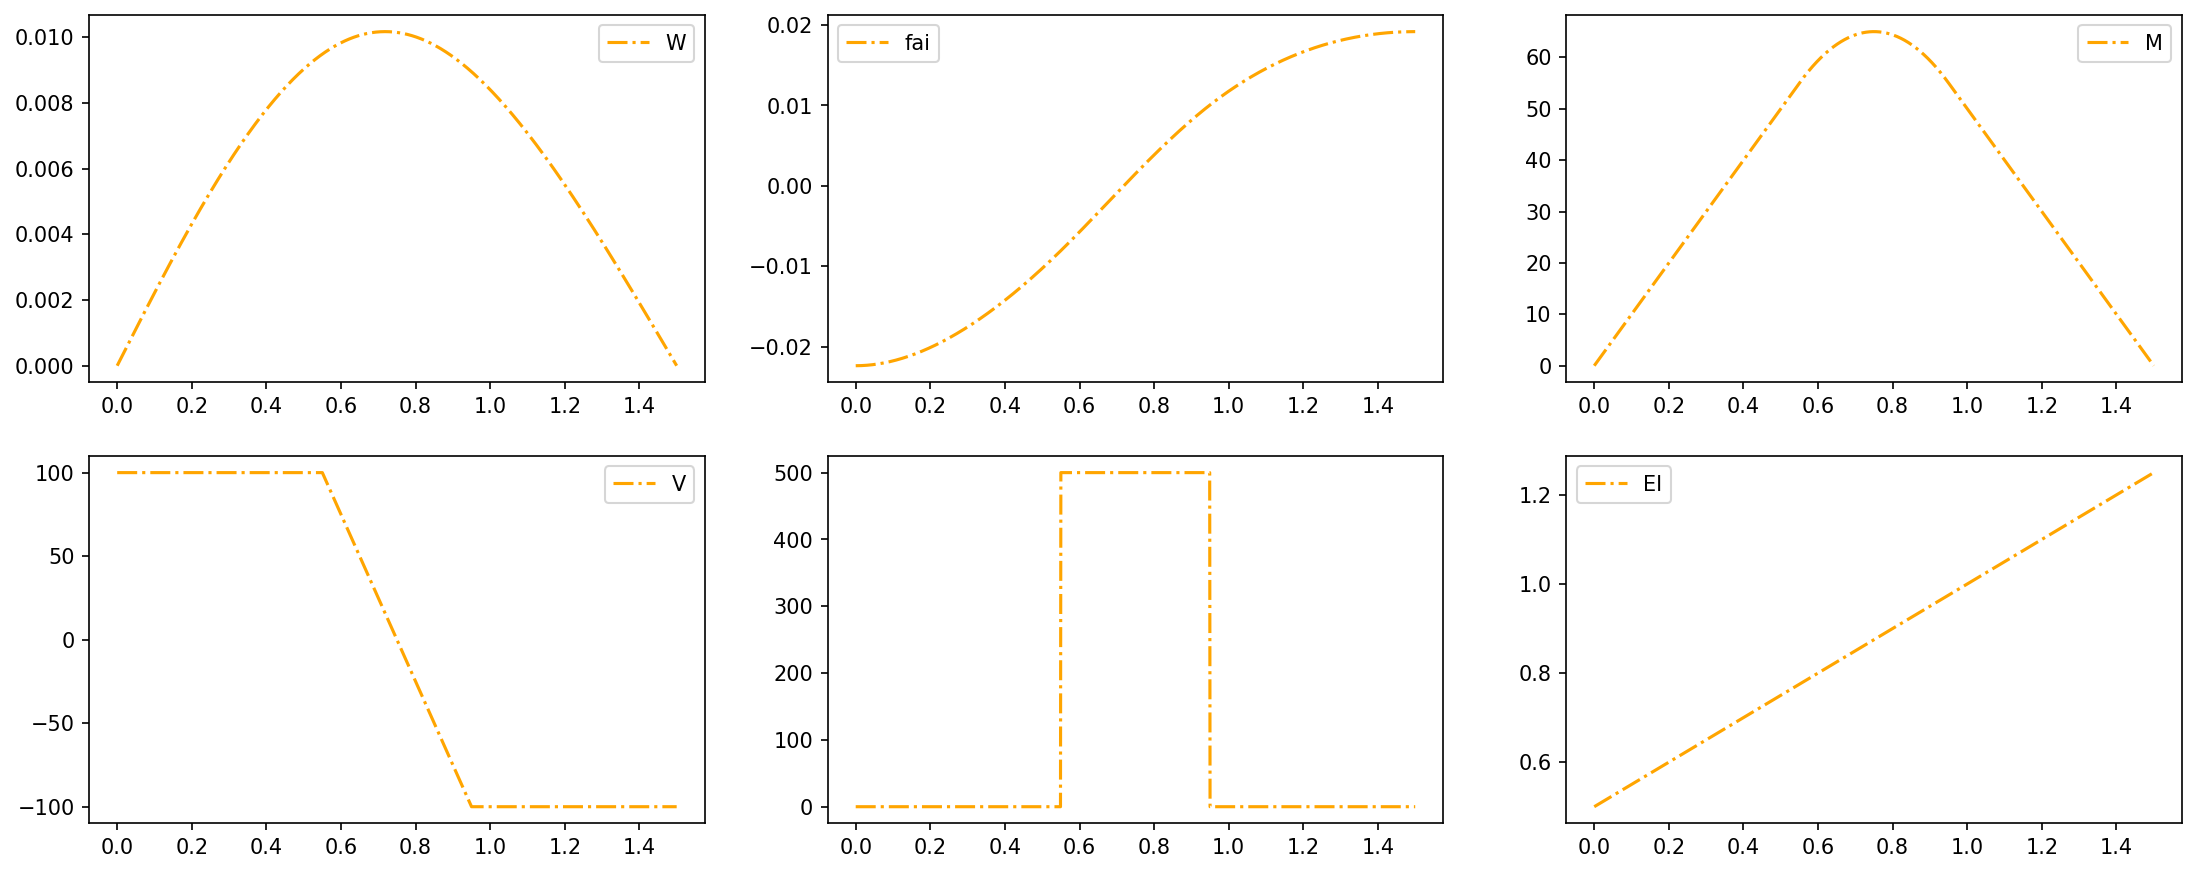

In [8]:
Q1_func = sp.lambdify(x, Q1_sym, 'numpy')
Q2_func = sp.lambdify(x, Q2_sym, 'numpy')
Q3_func = sp.lambdify(x, Q3_sym, 'numpy')

V1_func = sp.lambdify(x, V1_sym, 'numpy')
V2_func = sp.lambdify(x, V2_sym, 'numpy')
V3_func = sp.lambdify(x, V3_sym, 'numpy')

M1_func = sp.lambdify(x, M1_sym, 'numpy')
M2_func = sp.lambdify(x, M2_sym, 'numpy')
M3_func = sp.lambdify(x, M3_sym, 'numpy')

fai1_func = sp.lambdify(x, fai1_sym, 'numpy')
fai2_func = sp.lambdify(x, fai2_sym, 'numpy')
fai3_func = sp.lambdify(x, fai3_sym, 'numpy')

W1_func = sp.lambdify(x, W1_sym, 'numpy')
W2_func = sp.lambdify(x, W2_sym, 'numpy')
W3_func = sp.lambdify(x, W3_sym, 'numpy')

EI1_func = sp.lambdify(x, EI1_sym, 'numpy')
EI2_func = sp.lambdify(x, EI2_sym, 'numpy')
EI3_func = sp.lambdify(x, EI3_sym, 'numpy')


EI1 = EI1_func(x1)
EI2 = EI2_func(x2)
EI3 = EI3_func(x3)
EEII1 = np.vstack((EI1,EI2,EI3))*EI_real
                  
Q1 = x1*0+Q1_func(x1)
Q2 = x2*0+Q2_func(x2)
Q3 = x3*0+Q3_func(x3)
ddddWW1 = np.vstack((Q1,Q2,Q3))

V1 = x1*0+V1_func(x1)
V2 = x2*0+V2_func(x2)
V3 = x3*0+V3_func(x3)
dddWW1 = np.vstack((V1,V2,V3))

M1 = M1_func(x1)
M2 = M2_func(x2)
M3 = M3_func(x3)
ddWW1 = np.vstack((M1,M2,M3))

fai1 = fai1_func(x1)
fai2 = fai2_func(x2)
fai3 = fai3_func(x3)
dWW1 = (np.vstack((fai1,fai2,fai3)))/ EI_real

W1 = W1_func(x1)
W2 = W2_func(x2)
W3 = W3_func(x3)
WW1 = np.vstack((W1,W2,W3))/ EI_real



                
plt.figure(figsize=(18,7),dpi=150)
plt.subplot(2,3,1)
# plt.vlines(0.75,-0.05,0.15)
# plt.hlines(0,0.6,0.8)
plt.plot(X1,WW1,label="W", linestyle='dashdot', color='orange')
plt.legend()
plt.subplot(2,3,2)
plt.plot(X1,dWW1,label="fai", linestyle='dashdot', color='orange')
plt.legend()
plt.subplot(2, 3, 3)
plt.plot(X1,ddWW1,label="M", linestyle='dashdot', color='orange')
plt.legend()
plt.subplot(2, 3, 4)
plt.plot(X1,dddWW1,label="V", linestyle='dashdot', color='orange')
plt.legend()
plt.subplot(2, 3, 5)
plt.plot(X1,ddddWW1,label="Q", linestyle='dashdot', color='orange')
plt.subplot(2, 3, 6)
plt.plot(X1,EEII1/EI_real,label="EI", linestyle='dashdot', color='orange')
plt.legend()

In [9]:
# import scipy.io as scio
# file_name='Dp=x.mat'
# data = scio.loadmat(file_name)
# All_w_data = data["D0"]
# X2 = data['xx'];

In [10]:
# plt.plot(X1,WW1,label="W", linestyle='dashdot', color='orange')
# plt.plot(X2.ravel(),All_w_data.ravel(),c='red',linewidth = 0.7)

In [11]:
dfai_real = ddWW1/EEII1